In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/Thesis/data/utrecht/*.jpg'
base = '/content/drive/My Drive/Colab Notebooks/Thesis/data/utrecht/'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn import model_selection 

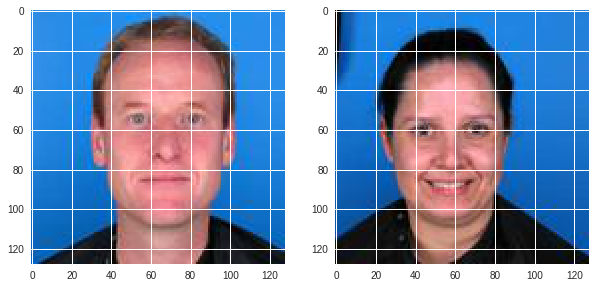

In [4]:
img = glob.glob(pwd) # Read all image's name

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(mpimg.imread(img[0]))
ax = fig.add_subplot(1,2,2)
plt.imshow(mpimg.imread(img[10]))

In [0]:
img_names = model_selection.train_test_split(img)

im_train = np.array([mpimg.imread(a) for a in img_names[0]])
im_test = np.array([mpimg.imread(a) for a in img_names[1]])

im_train = im_train.astype('float32') / 255.
im_test = im_test.astype('float32') / 255.

In [6]:
from keras import layers
from keras import models

Using TensorFlow backend.


Do a simple Autoencoder on the Black Channel and compare the result with the PCA.

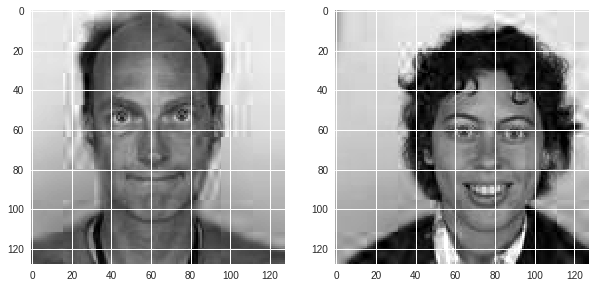

In [7]:
train_bl = np.array([mpimg.imread(a)[:,:,2] for a in img_names[0]])
test_bl = np.array([mpimg.imread(a)[:,:,2] for a in img_names[1]])
train_bl = train_bl.astype('float32') / 255.
test_bl = test_bl.astype('float32') / 255.

fig = plt.figure(figsize = (10,50))
ax = fig.add_subplot(1,2,1)
plt.imshow(train_bl[0])
plt.gray()
ax = fig.add_subplot(1,2,2)
plt.imshow(test_bl[1])
plt.gray()

train_bl = train_bl.reshape((len(train_bl), np.prod(train_bl.shape[1:])))
test_bl = test_bl.reshape((len(test_bl), np.prod(test_bl.shape[1:])))

In [8]:
input_dim = 128*128
encode_dim = 32*32

simple_auto = models.Sequential()
simple_auto.add(layers.Dense(encode_dim,activation='relu'))
simple_auto.add(layers.Dense(input_dim,activation='sigmoid'))

simple_auto.compile(optimizer='adam', loss='mean_squared_error')

simple_auto.fit(train_bl, train_bl, epochs=100,batch_size=15)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
91/91 [==============================] - 6s 62ms/step - loss: 0.0567
Epoch 2/100
91/91 [==============================] - 4s 46ms/step - loss: 0.0360
Epoch 3/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0346
Epoch 4/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0341
Epoch 5/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0323
Epoch 6/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0304
Epoch 7/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0270
Epoch 8/100
91/91 [==============================] - 4s 46ms/step - loss: 0.0252
Epoch 9/100
91/91 [==============================] - 4s 46ms/step - loss: 0.0226
Epoch 10/100
91/91 [==============================] - 4s 45ms/step - loss: 0.0213
Epoch 11/100
91/91 [==============================] - 4s 46ms/step - 

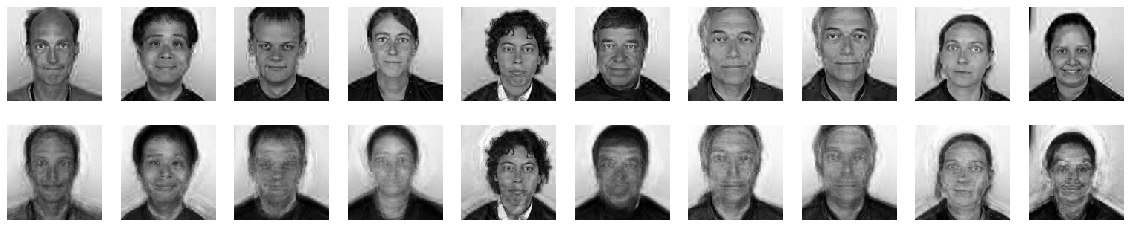

In [10]:
decoded_imgs = simple_auto.predict(train_bl)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

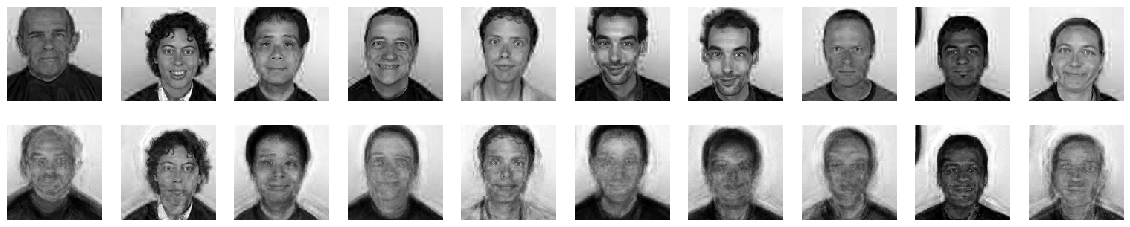

In [11]:
decoded_imgs = simple_auto.predict(test_bl)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolution Autoencoder

In [51]:
Autoencoder_1c = models.Sequential()

Autoencoder_1c.add(layers.Conv2D(8,(3,3),activation='relu',padding='same',input_shape=(128,128,1)))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
Autoencoder_1c.add(layers.Conv2D(16,(3,3),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
Autoencoder_1c.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
#Autoencoder_1c.add(layers.Dense(16,activation='relu'))
Autoencoder_1c.add(layers.Conv2DTranspose(32,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(16,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(8,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(1,(4,4),activation='sigmoid',padding='same'))

Autoencoder_1c.compile(optimizer='adam', loss='mean_squared_error')

Autoencoder_1c.summary()

Autoencoder_1c.fit(im_train[:,:,:,2].reshape(91,128,128,1), im_train[:,:,:,2].reshape(91,128,128,1), epochs=30,batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_transpose_43 (Conv2DT (None, 128, 128, 32)      16416     
_________________________________________________________________
conv2d_transpose_44 (Conv2DT (None, 128, 128, 16)      8208      
_________________________________________________________________
conv2d_transpose_45 (Conv2DT (None, 128, 128, 8)       2056      
_________________________________________________________________
conv2d_transpose_46 (Conv2DT (None, 128, 128, 1)       129       
Total para

In [52]:
Autoencoder_1c.evaluate(im_test[:,:,:,2].reshape(31,128,128,1),im_test[:,:,:,2].reshape(31,128,128,1))

31/31 [==============================] - 2s 69ms/step


0.00013232474157121032

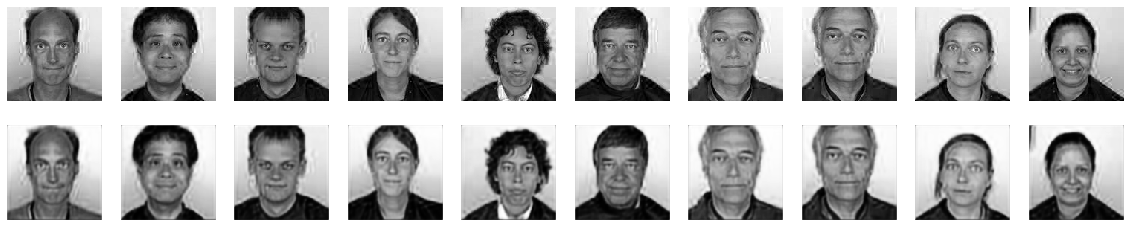

In [53]:
decoded_imgs = Autoencoder_1c.predict(im_train[:,:,:,2].reshape(91,128,128,1))
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

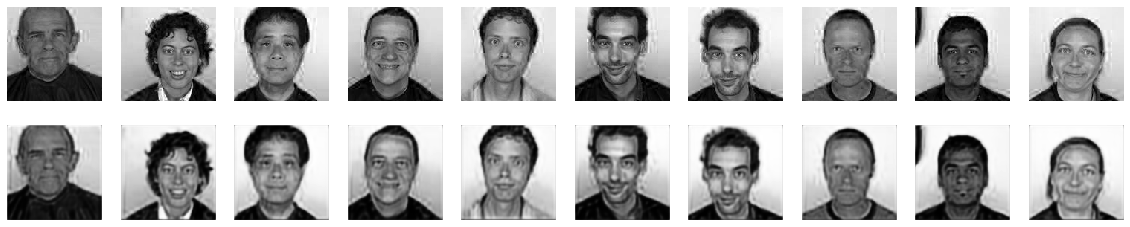

In [54]:
decoded_imgs = Autoencoder_1c.predict(im_test[:,:,:,2].reshape(31,128,128,1))
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
Autoencoder = models.Sequential()

Autoencoder.add(layers.Conv2D(8,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
Autoencoder.add(layers.Conv2D(16,(3,3),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(32,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(16,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(8,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(3,(4,4),activation='sigmoid',padding='same'))

Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Autoencoder.summary()

Autoencoder.fit(im_train, im_train, epochs=30,batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 128, 8)       224       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_transpose_39 (Conv2DT (None, 128, 128, 32)      16416     
_________________________________________________________________
conv2d_transpose_40 (Conv2DT (None, 128, 128, 16)      8208      
_________________________________________________________________
conv2d_transpose_41 (Conv2DT (None, 128, 128, 8)       2056      
_________________________________________________________________
conv2d_transpose_42 (Conv2DT (None, 128, 128, 3)       387       
Total para

In [50]:
Autoencoder.evaluate(im_test,im_test)

31/31 [==============================] - 2s 68ms/step


0.0015787604497745633

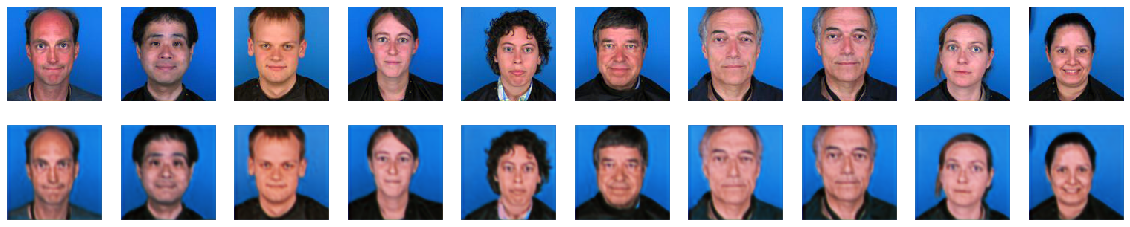

In [48]:
decoded_imgs = Autoencoder.predict(im_train)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(im_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

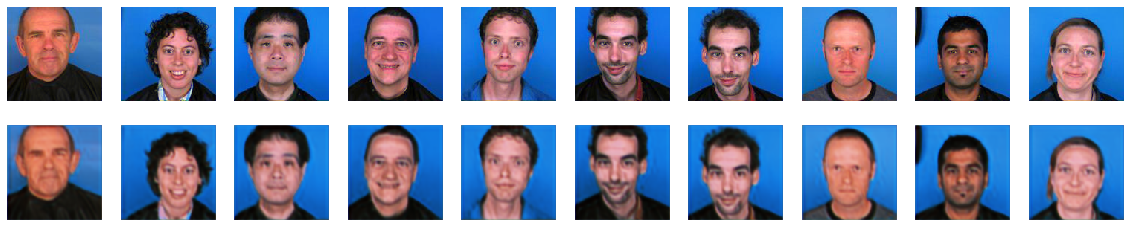

In [49]:
decoded_imgs = Autoencoder.predict(im_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(im_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()